# Seaborn

Statistical plotting library

In [1]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
tips = sns.load_dataset('tips') #loads the installed tips dataset

In [3]:
tips.head() #tips is a dataframe :D

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 6.8 KB


## Distribution plot 
Plot a univariate distribution of observations

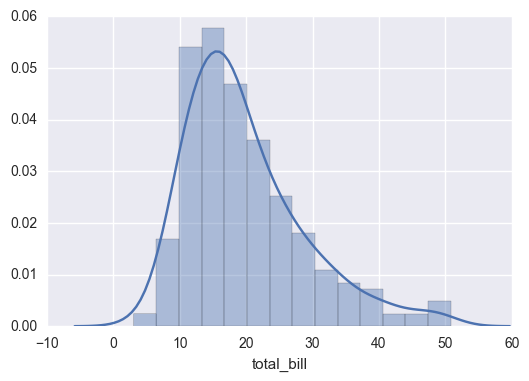

In [5]:
sns.distplot(tips['total_bill'])
#gives a histogram of all the values in the given column
#bins vs counts
#Line: Kernel density estimation

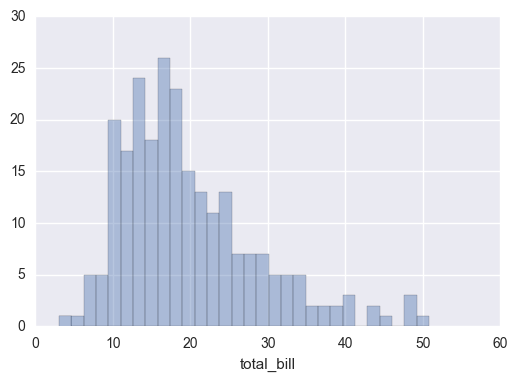

In [7]:
sns.distplot(tips['total_bill'], kde=False, bins=30) #remove kde line

## Joint Plot
Combines two different distribution plots

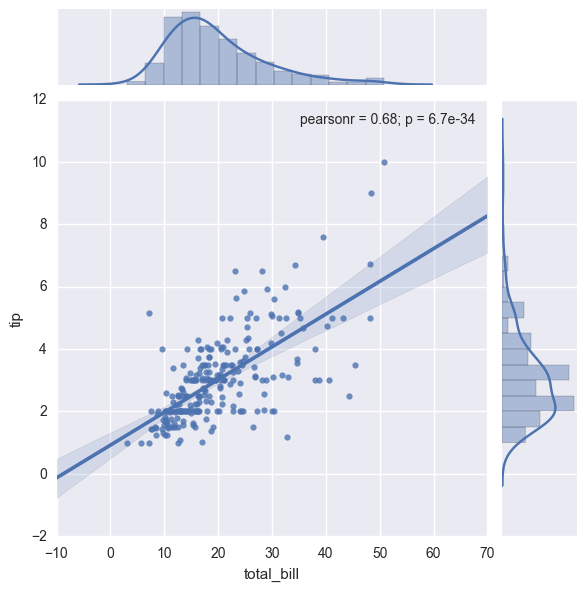

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
#pass in two colums and a dataset
#the two colums are the variables we want to check against each other
#kind lets affect what's going on inside the main plot 
#kind-default: scatter
#other options: 
#reg for linear regression, 
#hex for hexagonal bins
#kde for density where points match up the most

## Pair plot
pairwise relationships across an entire data frame

does joint plot for every possible combination in dataframe

takes a while if you've got a large dataframe

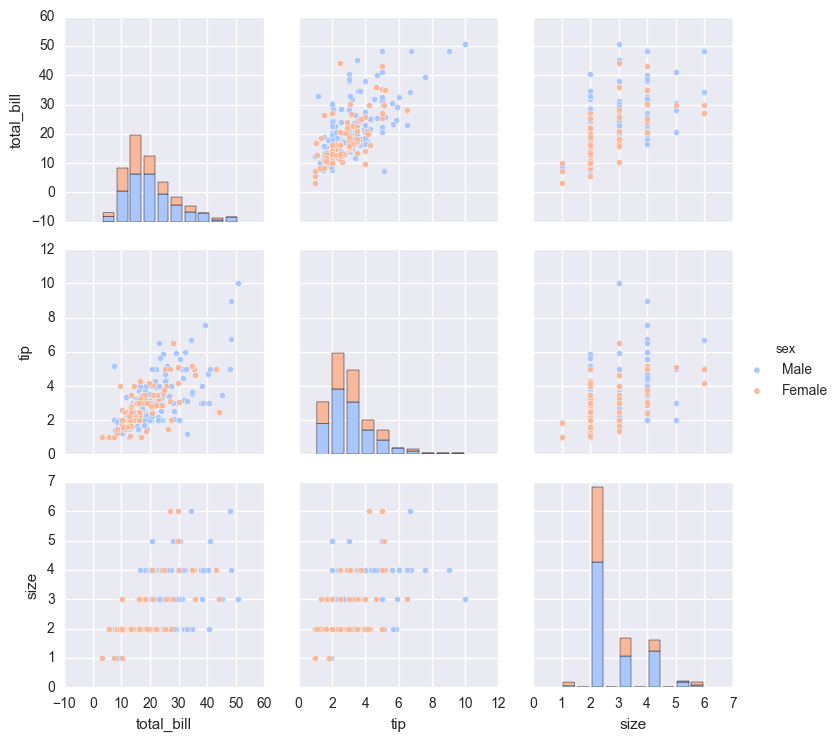

In [14]:
sns.pairplot(tips, hue='sex', palette='coolwarm')
#hue: takes categorical variable, pairplot colors plot :D
#palette: colors

## Rug plot

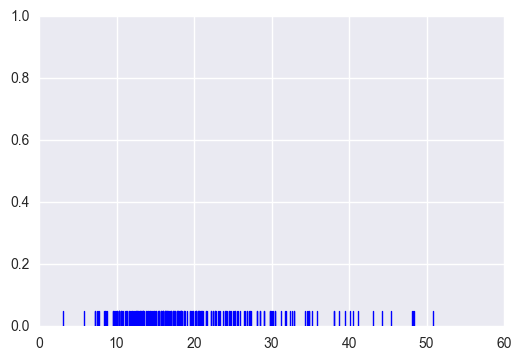

In [16]:
sns.rugplot(tips['total_bill'])
#one line for exery point along the distribution line
#the sum of all the normal distributions around the dashes
#gives the kde line from earlier

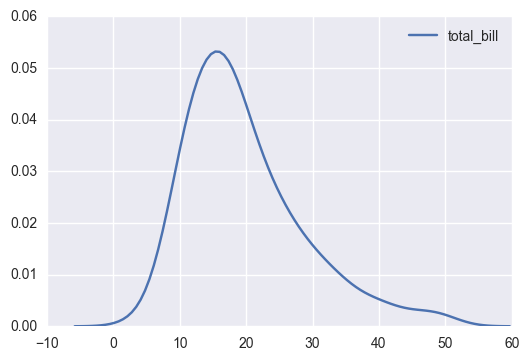

In [18]:
sns.kdeplot(tips['total_bill'])
#this gives only the kde line

## Categorical Plots

## Bar Plot
Visualization of group by statement

In [4]:
import numpy as np

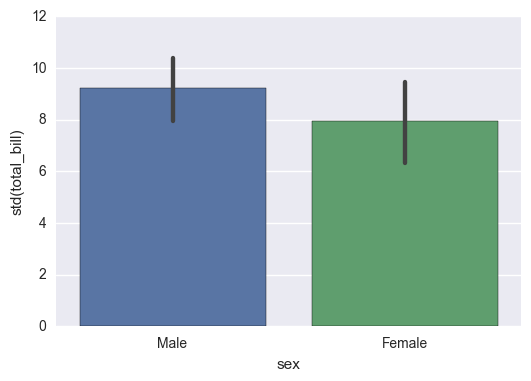

In [5]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)
#estimator is aggregate function, can be customized

## Count plot
Same as a bar plot, estimator is explicitely counting the number of occurences

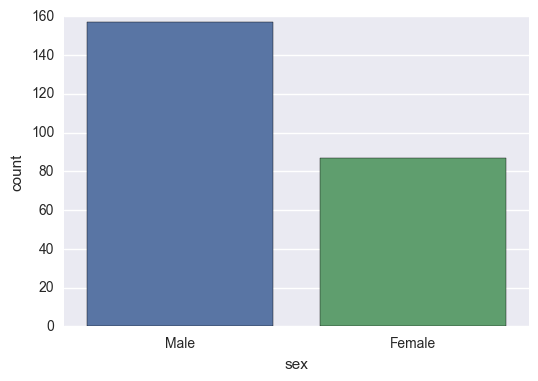

In [6]:
sns.countplot(x='sex', data=tips)
#same as barplot with estimator=np.count

## Box plot
distribution of categorical data

sometimes called box and whisker plot 

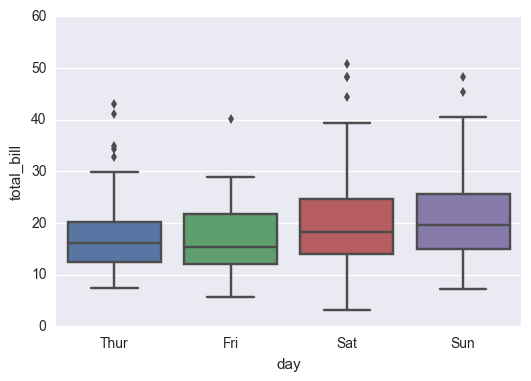

In [7]:
sns.boxplot(x='day', y='total_bill', data=tips)
#shows quartiles of the data set:
# |-quarter-[quarter|quarter]-quarter-| ..of the points for every box
#whiskers extend to show rest of distribution
#point outside whiskers are outliers

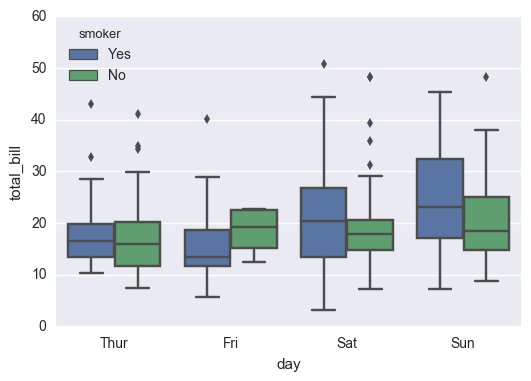

In [8]:
#we can additionally split boxes by one more categorical column:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')
#this is the power of seaborn! with very little code, 
#you get whole other layer of data very quickly

## Violin Plot
similar to box plot, will also show the distribution, takes same arguments

has more information, namely shows the kde line

at the same time, little more difficult to read

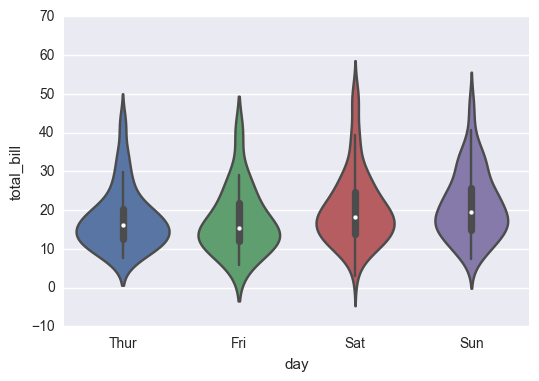

In [9]:
sns.violinplot(x='day', y='total_bill', data=tips)

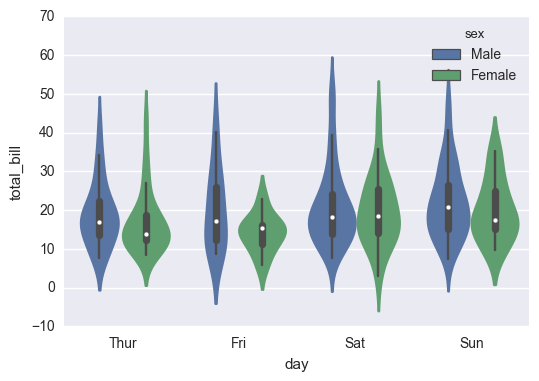

In [10]:
#can do hue: 
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex')

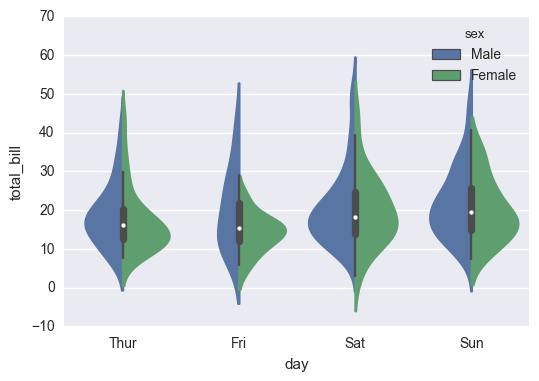

In [11]:
#as halfes are doubled, we can split up the hue: 
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)
#this allows to compare the distributions based of another category
#and see the the differences between categories as well :D

## Strip plot

Scatter plot based on the category

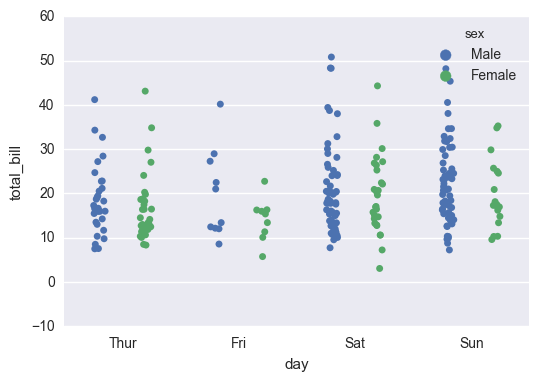

In [15]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', split=True)
#jitter: adds random nois, to better tell if there are points stacking on each other


## Swarm plot

combine strip plot and violine plot

shows the distribution, actually showing all the points themselves

sometimes don't scale for large datasets

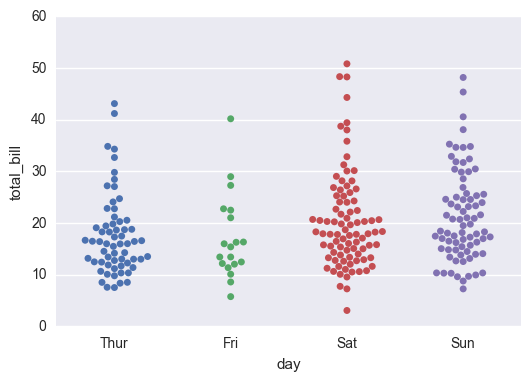

In [16]:
sns.swarmplot(x='day', y='total_bill', data=tips)

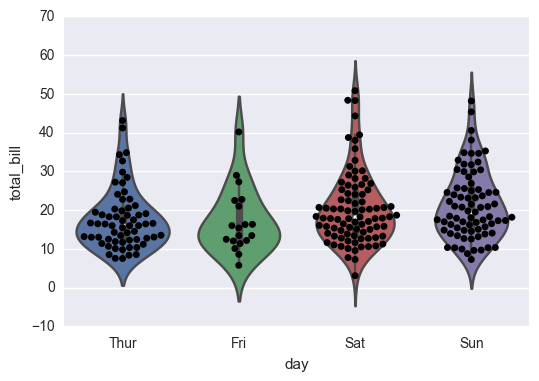

In [17]:
#combine with violin-plot: 
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')
#maybe to much for presentation, 
#better for exploratory data analysis

# Factor plot 

most general method, kind specifies the plot-type itself

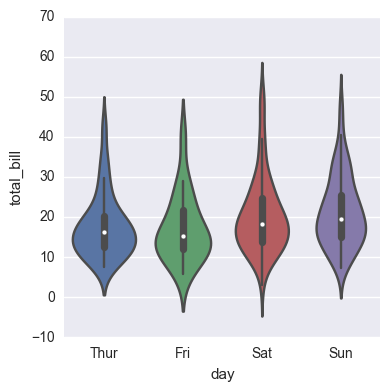

In [18]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

In [2]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
flights.head()

/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Matrix Plots
Heat maps: Bring data in good form by having columns and rows as variables

In [4]:
tc = tips.corr()
#convert dataframe in matrix-style correlation data-set

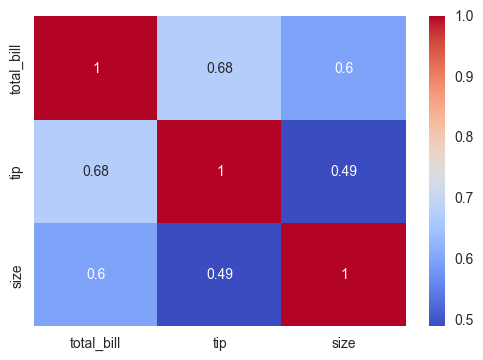

In [7]:
sns.heatmap(tc, annot=True, cmap='coolwarm')
#annot for annotation prints the numerical value in the cells
#cmap for colormap specifies style

In [9]:
#bring flights dataframe in a matrix form: 
fp = flights.pivot_table(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


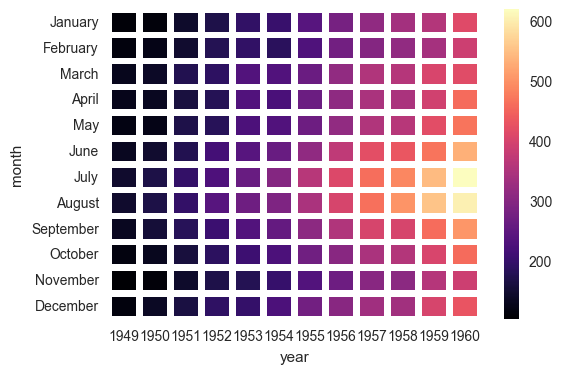

In [13]:
#now visualize this data: 
sns.heatmap(fp, cmap='magma', linecolor='white', linewidth=4)

## Cluster Map
Second matrix type plot in seaborn

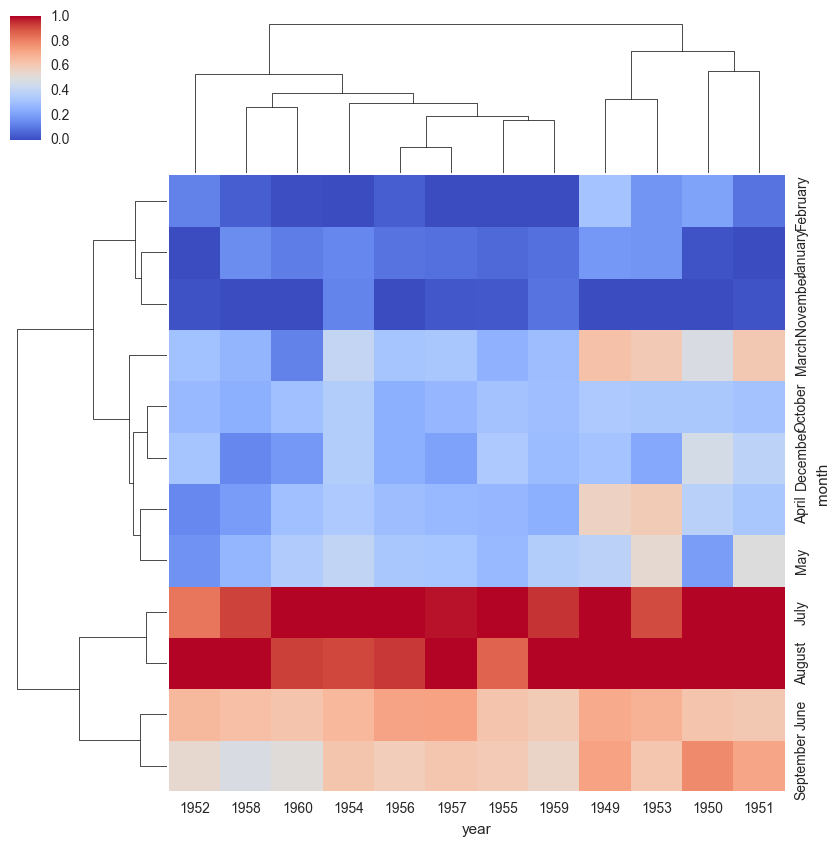

In [16]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)
#this trys to cluster colums and rows together based on their similarity
#similar groups are now close to each other
#the order of years and months is not kept in place, but reorderd.
#standard_scale = 1 puts it on a normalized scale

## Regression Plots
LM Plot: Linear Models

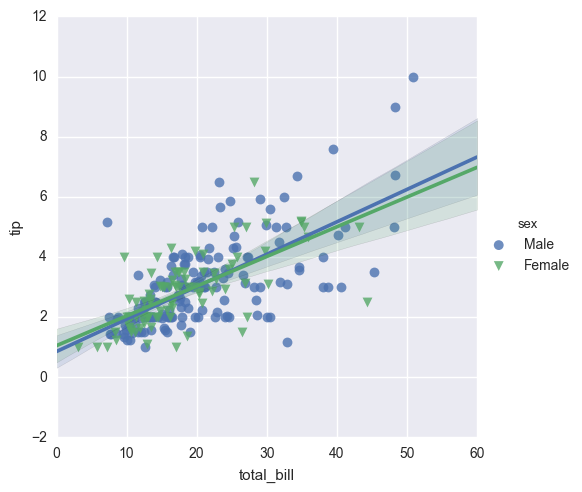

In [21]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], 
          scatter_kws={'s':50})
#hue='sex' splits categorically in male/female
#scatter_kws={'s':50} is a dictionary to reference the markersize set by matplotlib

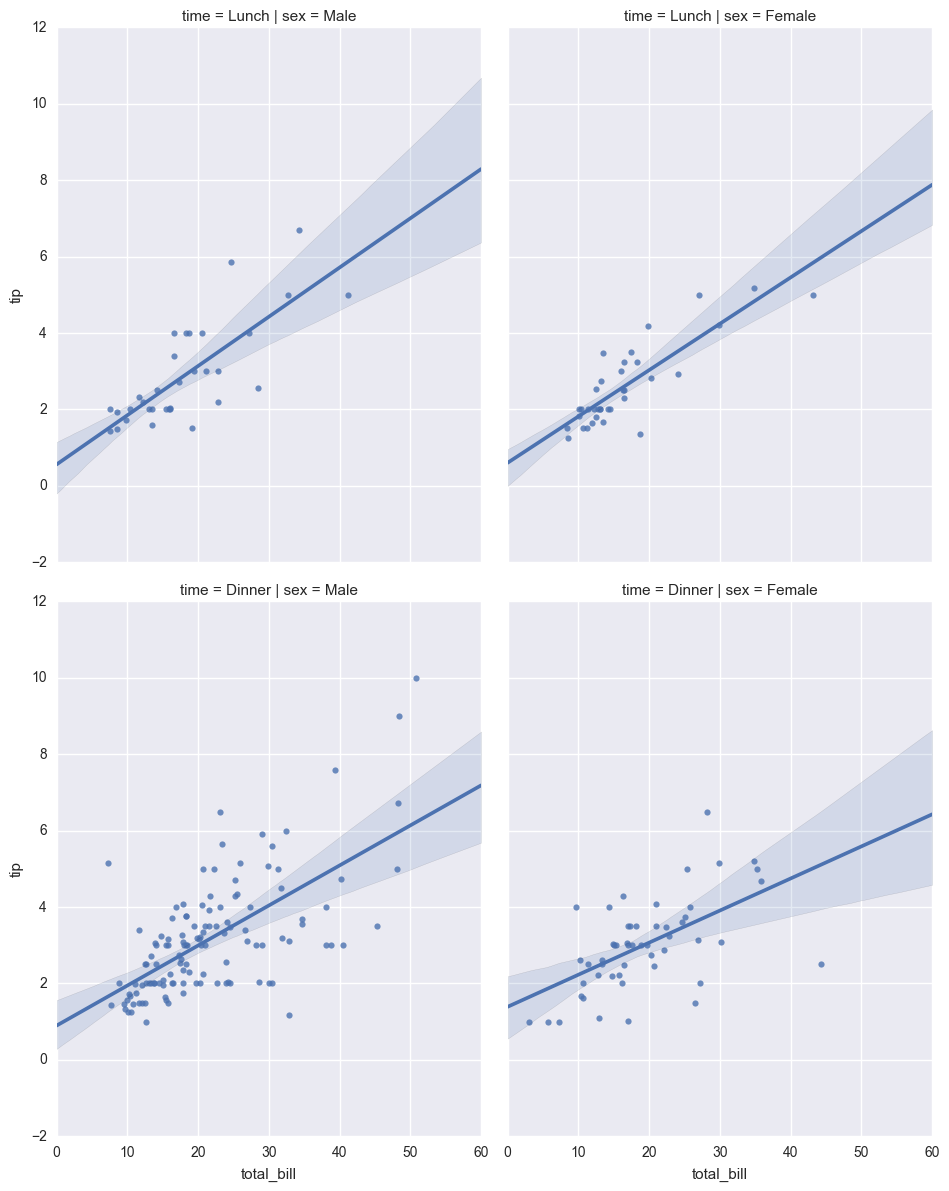

In [27]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time',
          aspect=0.8, size=6)
#here we separate by columns instead of separating by color (hue)
#we can split by row with e.g. time as categorical data as well 

## Grids

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

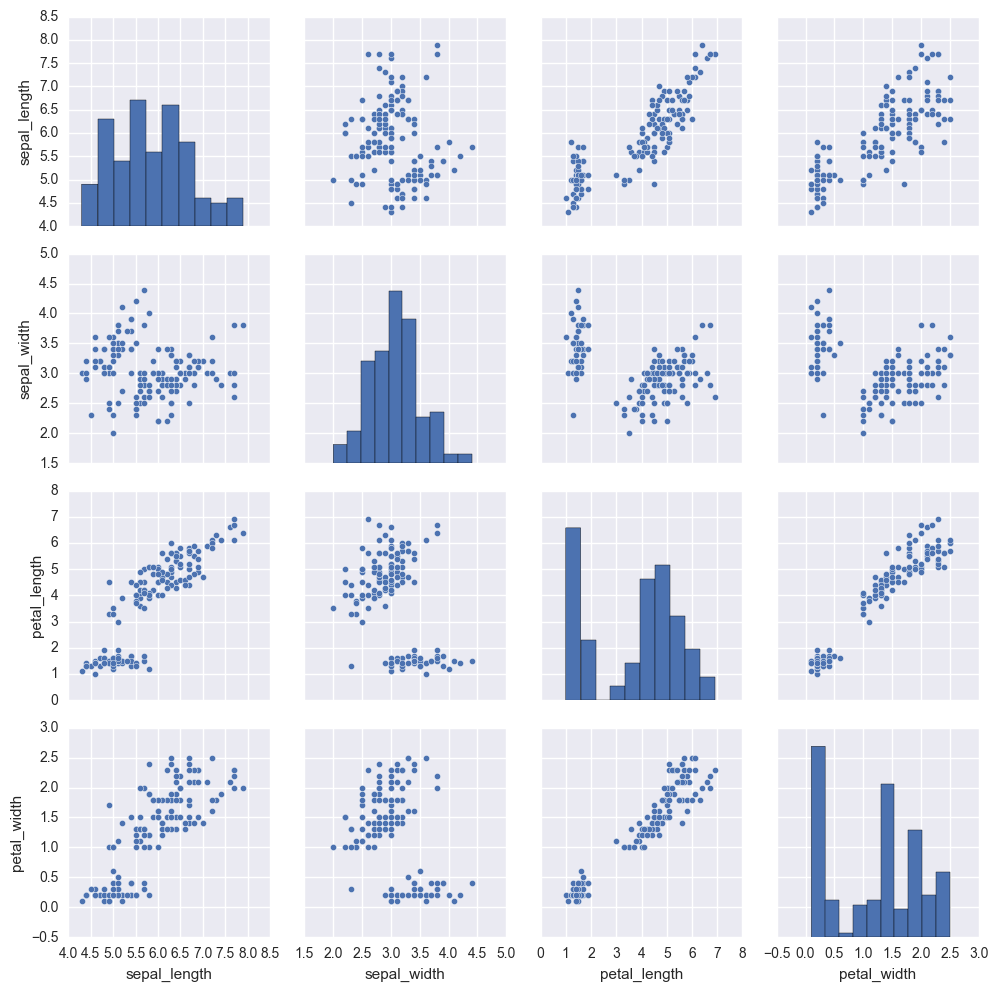

In [31]:
sns.pairplot(iris)

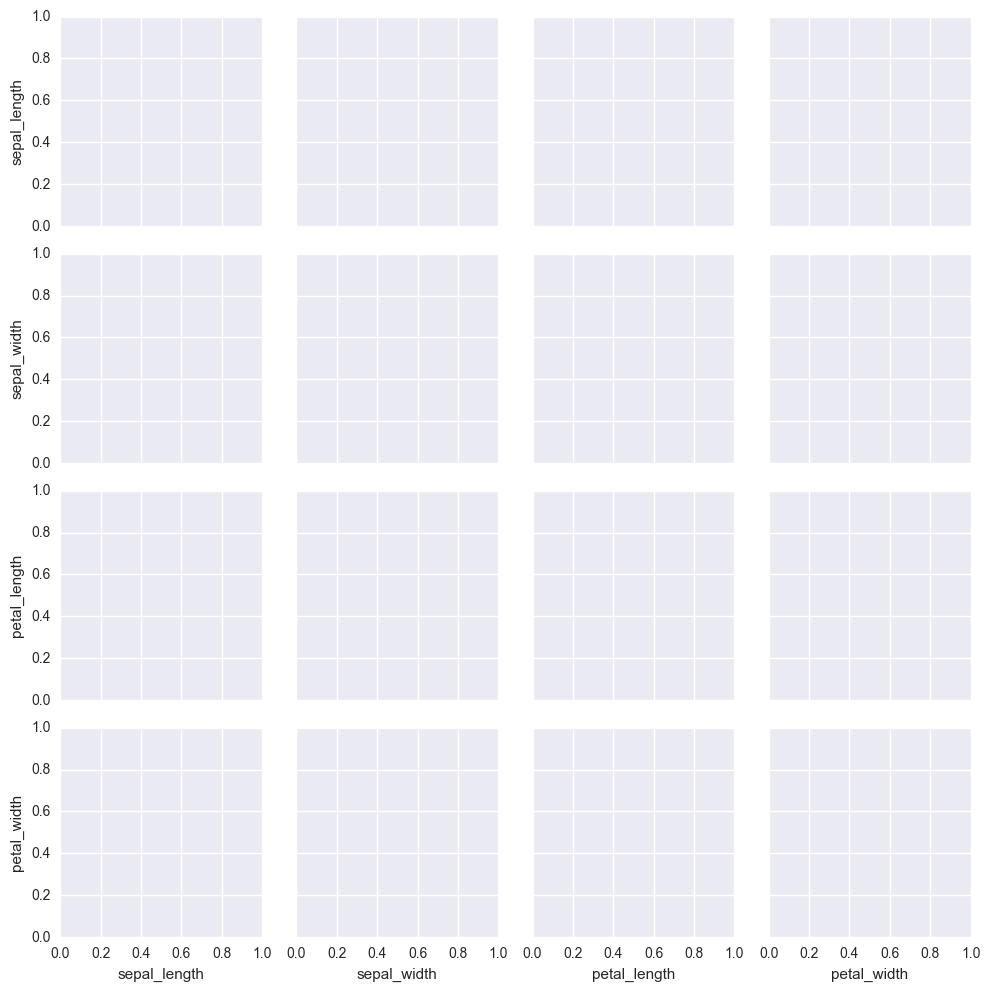

In [32]:
sns.PairGrid(iris)
#this sets up the subplots

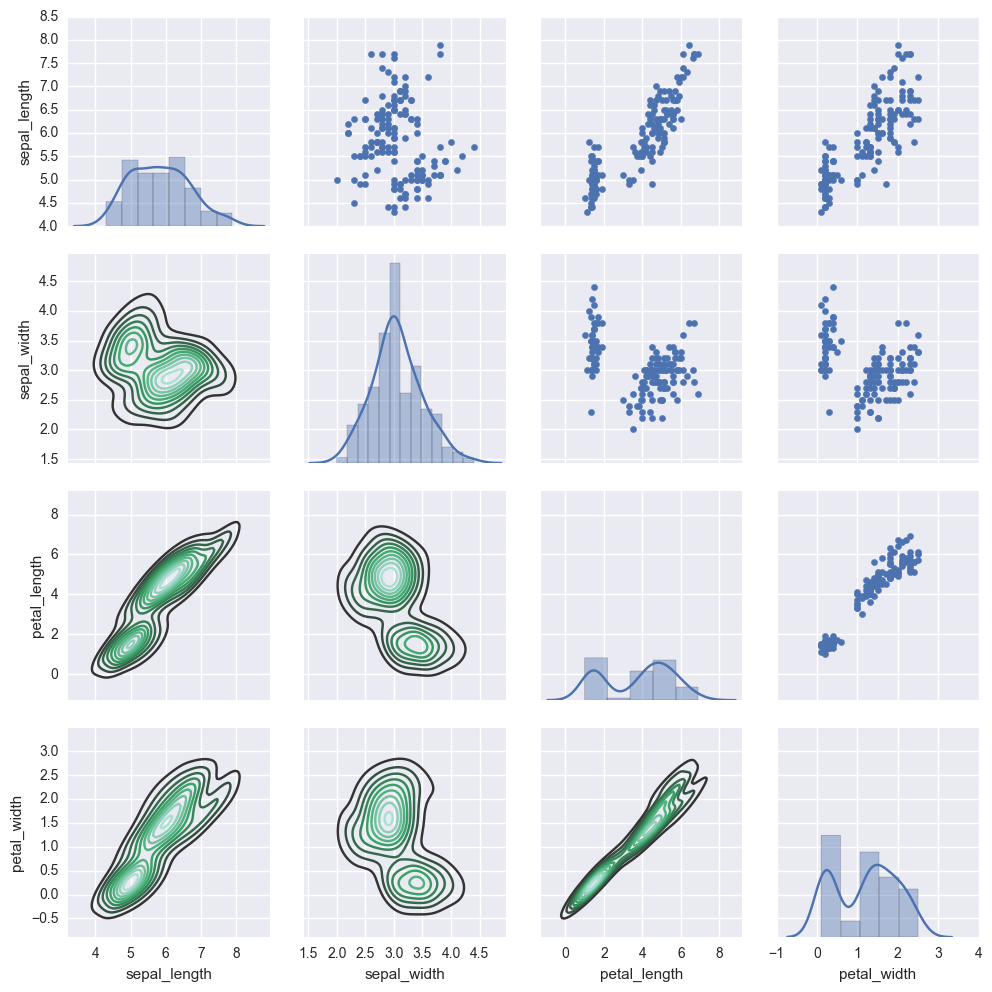

In [37]:
#set this PairGrid to a variable and call methods: 
import matplotlib.pyplot as plt
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

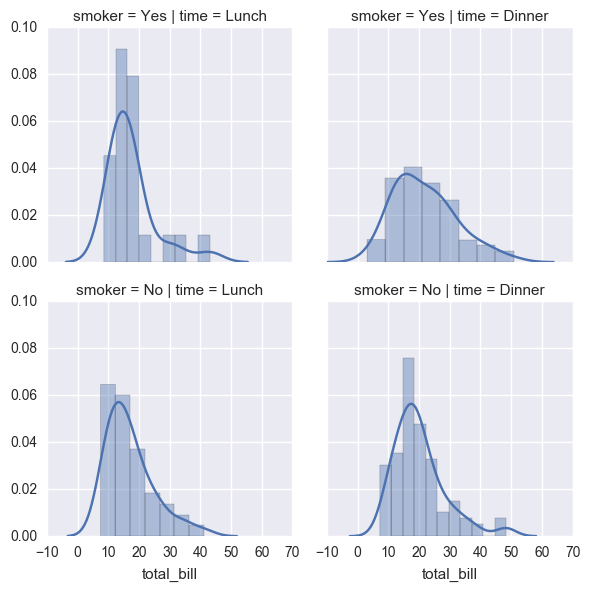

In [39]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.distplot, 'total_bill')
#mapping a plot type: one argument for what to plot
#separating the plot types by colums and rows

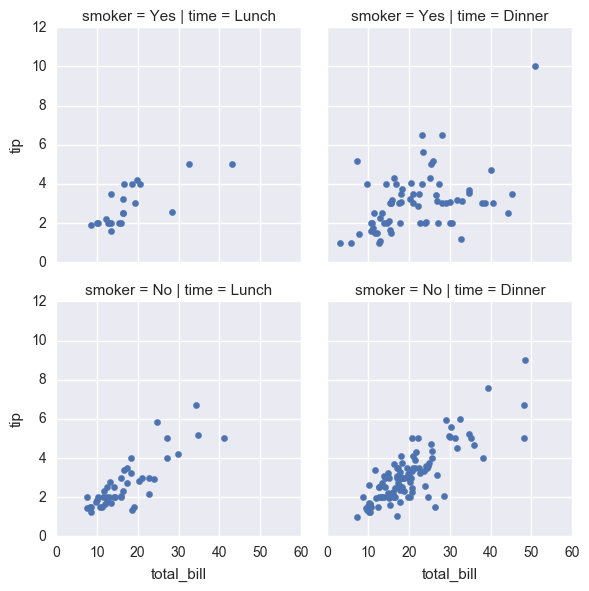

In [41]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

## Joint Grid

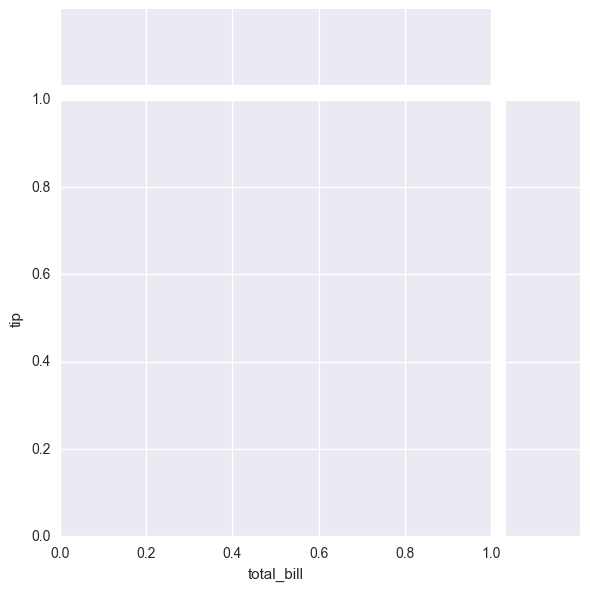

In [4]:
g = sns.JointGrid(x='total_bill', y = 'tip', data=tips)

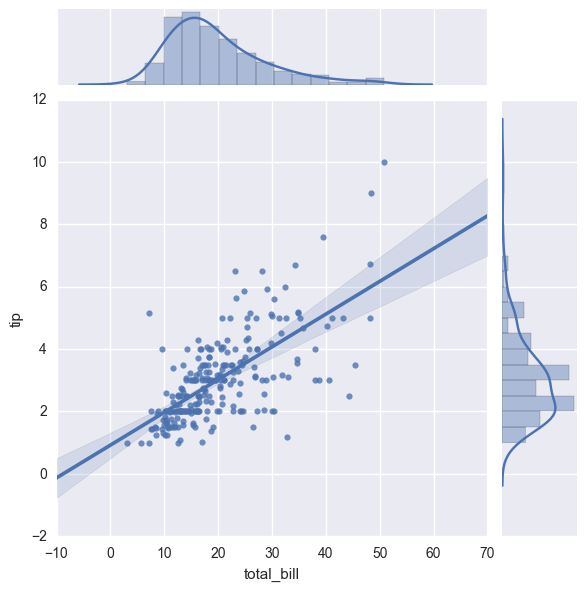

In [6]:
g = sns.JointGrid(x='total_bill', y='tip', data=tips)
g = g.plot(sns.regplot, sns.distplot)

## Style and Color

check out http://seaborn.pydata.org/tutorial/aesthetics.html

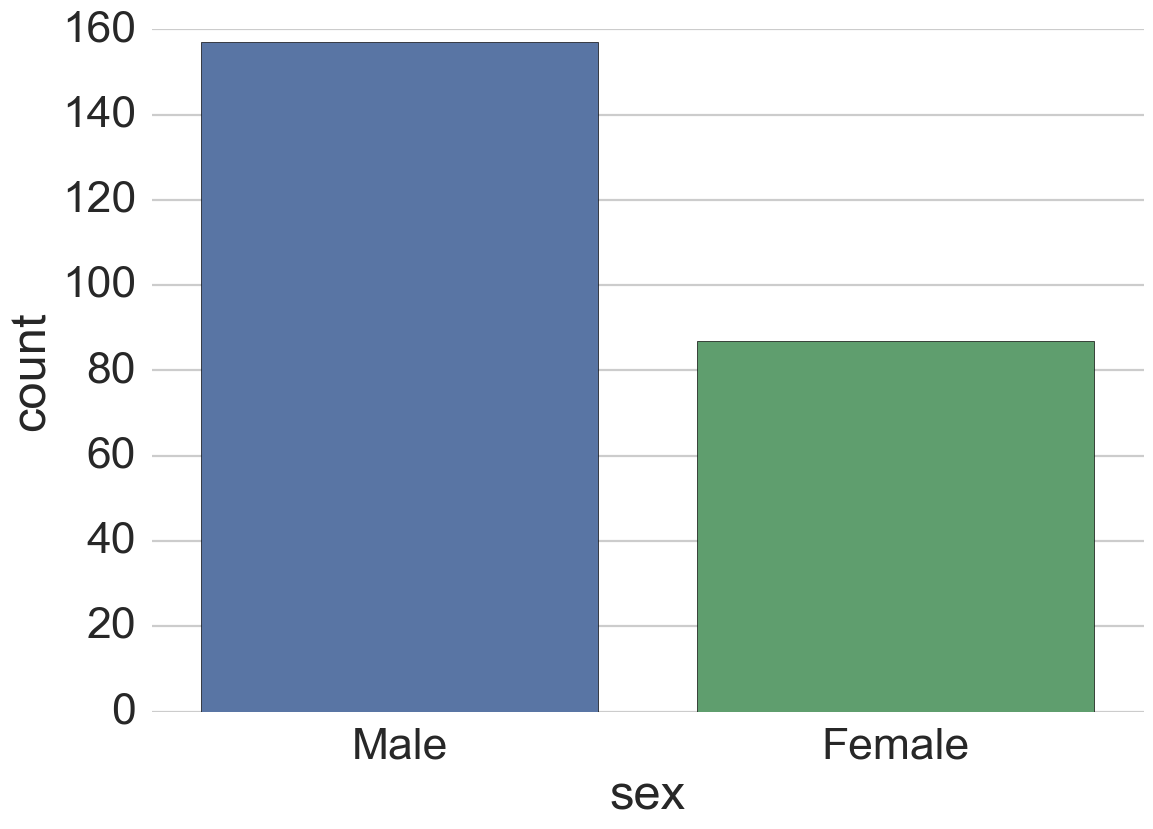

In [52]:
#plt.figure(figsize=(12,3)) #set size with matplotlib
sns.set_context('poster', font_scale=2) #paper, notebook, talk or poster
sns.set_style('whitegrid') #ticks, darkgrid, white
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom='True')

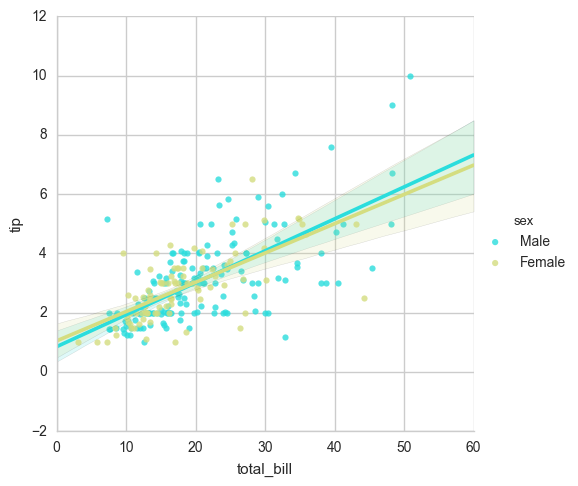

In [62]:
sns.set_context('notebook')
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='rainbow')
#colormaps: http://matplotlib.org/examples/color/colormaps_reference.html